In [21]:
import itertools
import matplotlib
from operator import itemgetter
import sys
sys.path.append('/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/methods')
from settings import *
import helpers
import keggAPI
%matplotlib inline
config_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/differential_expression_analysis/config"
config_dict = helpers.process_config(config_file)

# Output
figures_dir = config_dict["out_dir"]["figures"]
results_dir = config_dict["out_dir"]["results"]

# Data
de_genes_file = config_dict["data"]["media_de_file"]
de_analysis_all_genes_file = config_dict["data"]["all_genes_file"]
pg_urine_file = config_dict["data"]["pg_urine_file"]
pg_uti_file = config_dict["data"]["pg_uti_file"]
counts = config_dict["data"]["deseq2_norm_counts_file"]

/Users/annasintsova/git_repos/HUTI-RNAseq/analysis/methods/helpers.py


In [1]:
# ...

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns;sns.set_style("ticks")
from operator import itemgetter
import os



today = dt.datetime.today().strftime("%Y-%m-%d")

meta_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/data/huti_patient_info_short.csv"
meta = pd.read_csv(meta_file, index_col=0)
meta

def sample_label(strain, treat, join = " | "):
    return strain+join+treat

col1 = "#f34236"
col2 = "#d6c571"
col3 = "#88bc67"
col4 = "#2e8174"
col5 = "#143969"
colors = [col1, col2, col3, col4, col5]
my_cmap = LinearSegmentedColormap.from_list('custom blue', [col5, col4, col2,col1], N=256)
ur = "URINE"
uti = "PATIENT"
join = " | "

# DESeq2 normalized counts
data = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/differential_expression_analysis/deseq_norm_counts.csv"        
data = pd.read_csv(data, index_col=0)
col_names = sorted([tuple(c.split("_")) for c in data.columns], key=itemgetter(1,0))
col_names = ["_".join(c) for c in col_names]
df = data[col_names]
df.columns = [sample_label(c.split("_")[0], ur) if "UR" in c else sample_label(c.split("_")[0], uti) for c in df.columns]


de_file = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/differential_expression_analysis/best_strains_DEseq.csv"
de_all_genes = pd.read_csv(de_file, index_col=0)
de_all_genes.head()
de_up = de_all_genes[(de_all_genes.log2FoldChange > 2) &( de_all_genes.padj < 0.01)]
de_down = de_all_genes[(de_all_genes.log2FoldChange <-2 ) &( de_all_genes.padj < 0.01)]

strain_qual = {'good':["HM56", "HM14", "HM43", "HM54", "HM86"],
              'okay':["HM56", "HM14", "HM43", "HM54", "HM86","HM01", "HM03", "HM06", "HM68"],
              'so-so':["HM57", "HM17", "HM07" "HM60"],
              'bad': ["HM66"]}


In [15]:
de = pd.read_csv(de_genes_file, index_col=0)
de.head()

baseMean  log2FoldChange     lfcSE       stat        pvalue  \
b4476  1488.531825        5.100177  0.333345  15.299976  7.648475e-53   
b3437  1474.527474        4.826310  0.403515  11.960673  5.709728e-33   
b1821   202.147835        4.647350  0.383798  12.108841  9.482438e-34   
b0990  1787.553949        4.546583  0.410317  11.080666  1.557104e-28   
b2169   291.824752        4.322020  0.306947  14.080653  4.994597e-45   

               padj  
b4476  1.014570e-50  
b3437  1.294693e-31  
b1821  2.246152e-32  
b0990  2.401743e-27  
b2169  3.081550e-43

In [22]:
filename = os.path.join(results_dir, "media_all_genes_edited.csv")
de_all_edited = keggAPI.add_gene_info_to_file(de_analysis_all_genes_file, filename=filename)

In [16]:
de_edited = keggAPI.add_gene_info_to_file(de_genes_file)
de_edited.head()

baseMean  log2FoldChange     lfcSE       stat        pvalue  \
Entry                                                                   
b4476  1488.531825        5.100177  0.333345  15.299976  7.648475e-53   
b3437  1474.527474        4.826310  0.403515  11.960673  5.709728e-33   
b1821   202.147835        4.647350  0.383798  12.108841  9.482438e-34   
b0990  1787.553949        4.546583  0.410317  11.080666  1.557104e-28   
b2169   291.824752        4.322020  0.306947  14.080653  4.994597e-45   

               padj  Name                                           Function  \
Entry                                                                          
b4476  1.014570e-50  gntU   gluconate transporter, low affinity GNT 1 system   
b3437  1.294693e-31  gntK                                 gluconate kinase 2   
b1821  2.246152e-32  mntP        putative Mn(2+) efflux pump, mntR-regulated   
b0990  2.401743e-27  cspG         cold shock protein homolog, cold-inducible   
b2169  3.081550e-43  fruB  fused fructose-specific PTS enzymes: IIA compo...   

                                                Pathways  
Entry                                                     
b4476                                                     
b3437  eco00030  Pentose phosphate pathway, eco01100 ...  
b1821                                                     
b0990                                                     
b2169  eco00051  Fructose and mannose metabolism, eco...

In [17]:
de_up = de_edited[de_edited.log2FoldChange > 2] # in Patients
de_up = de_up[["log2FoldChange", "padj", "Name", "Function", "Pathways"]].sort_index()
de_up.head()

log2FoldChange          padj  Name  \
Entry                                       
b0010        2.612565  5.731661e-10  satP   
b0013        2.668866  8.355803e-15  yaaI   
b0023        2.176472  1.535949e-28  rpsT   
b0058        2.428475  2.636524e-20  rluA   
b0059        2.832296  1.474793e-53  rapA   

                                                Function            Pathways  
Entry                                                                         
b0010                      succinate-acetate transporter                      
b0013                             UPF0412 family protein                      
b0023                  30S ribosomal subunit protein S20  eco03010  Ribosome  
b0058  dual specificity 23S rRNA pseudouridine(746), ...                      
b0059  RNA polymerase remodeling/recycling factor ATP...

In [18]:
de_down = de_edited[de_edited.log2FoldChange < -2]
de_down = de_down[["log2FoldChange", "padj", "Name", "Function", "Pathways"]].sort_index()
de_down.head()

log2FoldChange          padj  Name  \
Entry                                       
b0061       -3.294363  5.492928e-08  araD   
b0062       -3.201546  1.661233e-07  araA   
b0063       -3.021728  2.918840e-05  araB   
b0071       -5.486186  2.008811e-31  leuD   
b0072       -5.078802  1.297481e-27  leuC   

                                          Function  \
Entry                                                
b0061           L-ribulose-5-phosphate 4-epimerase   
b0062                        L-arabinose isomerase   
b0063                               L-ribulokinase   
b0071  3-isopropylmalate dehydratase small subunit   
b0072  3-isopropylmalate dehydratase large subunit   

                                                Pathways  
Entry                                                     
b0061  eco00040  Pentose and glucuronate interconvers...  
b0062  eco00040  Pentose and glucuronate interconvers...  
b0063  eco00040  Pentose and glucuronate interconvers...  
b0071  eco00290  Valine, leucine and isoleucine biosy...  
b0072  eco00290  Valine, leucine and isoleucine biosy...

In [20]:

de_up.to_csv(os.path.join(results_dir, today+"_UPREGULATED_IN_PATIENTS.csv"))
de_down.to_csv(os.path.join(results_dir, today+"_DOWNREGULATED_IN_PATIENTS.csv"))


In [24]:
de_up.to_excel(os.path.join(results_dir, "UP_CHANGES_IN_GENE_EXPRESSION_IN_PATIENTS.xlsx"))
de_down.to_excel(os.path.join(results_dir, "DOWN_CHANGES_IN_GENE_EXPRESSION_IN_PATIENTS.xlsx"))

ModuleNotFoundError: No module named 'openpyxl'

In [2]:
# ...
gene_info_file = os.path.join(results_folder, "/Users/annasintsova/git_repos/HUTI-RNAseq/results/differential_expression_analysis/2018-05-24_all_gene_names_info.tab")
gene_info = pd.read_csv(gene_info_file, sep="\t", header=None, index_col=0,
                        names=["","gene_name", "function", "pathway"])
fx = gene_info.function
fx = fx.str.replace("\(RefSeq\)", "")
gene_info.function = fx
gene_info
df_all = de_all_genes[["baseMean", "log2FoldChange","padj"]]
df_all = df_all.merge(gene_info, how="left", left_index=True, right_index=True).sort_index()
df_all.head()

baseMean  log2FoldChange      padj gene_name  \
b0002  2524.965484       -0.055712  0.894307      thrA   
b0003  1336.270850       -0.382777  0.487691      thrB   
b0004  1067.553271       -0.364933  0.456064      thrC   
b0006  2319.560051        0.937212  0.020111      yaaA   
b0007   237.375000       -1.394198  0.000006      yaaJ   

                                                function  \
b0002   Bifunctional aspartokinase/homoserine dehydro...   
b0003                                  homoserine kinase   
b0004                               L-threonine synthase   
b0006   peroxide resistance protein, lowers intracell...   
b0007                               putative transporter   

                                                 pathway  
b0002  eco00260  Glycine, serine and threonine metabo...  
b0003  eco00260  Glycine, serine and threonine metabo...  
b0004  eco00260  Glycine, serine and threonine metabo...  
b0006                                                NaN  
b0007                                                NaN

In [3]:
# ... 
gene_info_file = os.path.join(results_folder, "/Users/annasintsova/git_repos/HUTI-RNAseq/results/differential_expression_analysis/2018-05-24_up_gene_names_info.tab.txt")
gene_info = pd.read_csv(gene_info_file, sep="\t", header=None, index_col=0,
                        names=["gene_name", "function", "pathway"])
fx = gene_info.function
fx = fx.str.replace("\(RefSeq\)", "")
gene_info.function = fx
gene_info
df_up = de_up[["baseMean", "log2FoldChange","padj"]]
df_up = df_up.merge(gene_info, how="left", left_index=True, right_index=True).sort_index()
df_up.head()

#df_up.to_excel(os.path.join(results_folder, "UP_CHANGES_IN_GENE_EXPRESSION_IN_PATIENTS.xlsx"))

baseMean  log2FoldChange          padj gene_name  \
b0010   1172.258784        2.908446  2.750000e-06      satP   
b0013     65.848454        2.501710  3.835130e-04      yaaI   
b0023  11151.703810        2.403709  1.260000e-17      rpsT   
b0048   1274.772119        2.397252  2.500000e-52      folA   
b0058    527.258884        2.085799  2.760000e-09      rluA   

                                                function  \
b0010                      succinate-acetate transporter   
b0013                             UPF0412 family protein   
b0023                  30S ribosomal subunit protein S20   
b0048                            dihydrofolate reductase   
b0058   dual specificity 23S rRNA pseudouridine(746),...   

                                                 pathway  
b0010                                                NaN  
b0013                                                NaN  
b0023                                 eco03010  Ribosome  
b0048  eco00670  One carbon pool by folate, eco00790 ...  
b0058                                                NaN

In [4]:
# ... 
gene_info_file = os.path.join(results_folder, "/Users/annasintsova/git_repos/HUTI-RNAseq/results/differential_expression_analysis/2018-05-24_down_gene_names_info.tab")
gene_info = pd.read_csv(gene_info_file, sep="\t", header=None, index_col=0,
                        names=["","gene_name", "function", "pathway"])

fx = gene_info.function
fx = fx.str.replace("\(RefSeq\)", "")
gene_info.function = fx
gene_info
df_down = de_down[["baseMean", "log2FoldChange","padj"]]
df_down = df_down.merge(gene_info, how="left", left_index=True, right_index=True).sort_index()
df_down.head()
#df_down.to_excel(os.path.join(results_folder, "DOWN_CHANGES_IN_GENE_EXPRESSION_IN_PATIENTS.xlsx"))

baseMean  log2FoldChange          padj gene_name  \
b0061    122.611605       -3.181688  2.290000e-05      araD   
b0062    356.064598       -3.642759  1.230000e-09      araA   
b0063    293.901383       -3.802945  3.480000e-07      araB   
b0071   5679.636684       -4.546992  1.570000e-08      leuD   
b0072  13398.715840       -4.372419  3.300000e-08      leuC   

                                           function  \
b0061            L-ribulose-5-phosphate 4-epimerase   
b0062                         L-arabinose isomerase   
b0063                                L-ribulokinase   
b0071   3-isopropylmalate dehydratase small subunit   
b0072   3-isopropylmalate dehydratase large subunit   

                                                 pathway  
b0061  eco00040  Pentose and glucuronate interconvers...  
b0062  eco00040  Pentose and glucuronate interconvers...  
b0063  eco00040  Pentose and glucuronate interconvers...  
b0071  eco00290  Valine, leucine and isoleucine biosy...  
b0072  eco00290  Valine, leucine and isoleucine biosy...

In [5]:
def get_subset_genes(df, key, col_return,column_name="Function"):
    keep = []
    for i, x in zip(df.index, df[column_name]):
        if not type(x) == str:
            continue
        if key in x:
            keep.append(i)
    return df.loc[keep][col_return]

In [6]:
# UP
col_return = ["log2FoldChange", "Name", "Function"]

ribosome = get_subset_genes(df_up, "ibosom", col_return)
rRNA = get_subset_genes(df_up, "rRNA", col_return])
rna_helicase = get_subset_genes(df_up, "helicase",col_return)
tRNA = get_subset_genes(df_up, "tRNA", col_return)
purine = get_subset_genes(df_up, "urine", col_return, "pathway")
pyrimidine = get_subset_genes(df_up, "yrimidine", col_return, "pathway")
all_trans = get_subset_genes(df_up, "transport", col_return)

aa_t = ["b1605", "b1907", "b2156", "b2678", "b2679", "b2796", "b2845",
       "b3184", "b3539", "b3795", "b3827", "b4156"]
aa_trans = df_up.loc[aa_t][col_return]


In [7]:
up_subsets={"Ribosomal Subunits":(ribosome, ribosome.shape[0]),
             "rRNA Modification":(rRNA, rRNA.shape[0]),
            "RNA Helicases": (rna_helicase, rna_helicase.shape[0]),
           "tRNA Synthesis/Modification": (tRNA, tRNA.shape[0]),
           "Purine Metabolism":(purine, purine.shape[0]),
           "Pyrimidine Metabolism":(pyrimidine, pyrimidine.shape[0]),
           "Amino Acid Transporters":(aa_trans, aa_trans.shape[0])}


In [8]:

def find_subset_means(dict_of_subsets, rpkms, qual = ""):
    means_list = []
    lab_list = []
    num_genes = []
    for lab, sub in dict_of_subsets.items():
        if not qual:
            subset_rpkms = df.loc[sub[0].index]
        else:
            subset_rpkms = df.loc[sub[0].index][[c for c in rpkms.columns if c.split(join)[0] in strain_qual[qual]]]
        means_list.append(subset_rpkms.mean())
        lab_list.append(lab)
        num_genes.append(sub[1])
        
    fDf = pd.concat(means_list, axis=1, keys =lab_list )
    fDf = fDf.T
    fDf.index = ["{} (n={})".format(c,n) for c,n in zip(fDf.index, num_genes)]
    return fDf

up_data = find_subset_means(up_subsets, df, )
up_data.head()
# NOT HAPPY WITH MY RPKMS?? Use normalized counts from DESeq2

HM01 | URINE  HM03 | URINE  HM06 | URINE  \
Ribosomal Subunits (n=45)            2946.775949   2823.484553   5208.789734   
rRNA Modification (n=10)              263.701412    325.262568    484.108968   
RNA Helicases (n=4)                   826.379997    606.556417   1039.609006   
tRNA Synthesis/Modification (n=15)    419.075785    516.116695    869.640192   
Purine Metabolism (n=6)              2390.090283   2272.772299   4150.008203   

                                    HM07 | URINE  HM14 | URINE  HM17 | URINE  \
Ribosomal Subunits (n=45)            2690.027144   3349.717381   5908.380731   
rRNA Modification (n=10)              261.857497    228.691476    268.147585   
RNA Helicases (n=4)                   642.868853    542.532711    770.305952   
tRNA Synthesis/Modification (n=15)    397.973441    383.150624    468.227683   
Purine Metabolism (n=6)              2186.293782   2506.609314   4031.731582   

                                    HM43 | URINE  HM54 | URINE  HM56 | URINE  \
Ribosomal Subunits (n=45)            5528.698709   5421.825879   6293.743919   
rRNA Modification (n=10)              187.163281    216.913794    153.159436   
RNA Helicases (n=4)                   652.125333    658.166258    572.620289   
tRNA Synthesis/Modification (n=15)    327.364710    328.254945    271.138691   
Purine Metabolism (n=6)              3636.564229   3918.556197   3970.823472   

                                    HM57 | URINE       ...        \
Ribosomal Subunits (n=45)            3944.445418       ...         
rRNA Modification (n=10)              167.942310       ...         
RNA Helicases (n=4)                   532.386437       ...         
tRNA Synthesis/Modification (n=15)    221.051608       ...         
Purine Metabolism (n=6)              2554.704691       ...         

                                    HM14 | PATIENT  HM17 | PATIENT  \
Ribosomal Subunits (n=45)             32896.664783    29184.695477   
rRNA Modification (n=10)                961.344885     1658.884954   
RNA Helicases (n=4)                    2468.370324     4536.013547   
tRNA Synthesis/Modification (n=15)     2699.921348     4685.118151   
Purine Metabolism (n=6)               20856.269930    22653.121119   

                                    HM43 | PATIENT  HM54 | PATIENT  \
Ribosomal Subunits (n=45)             23268.637566    21912.962019   
rRNA Modification (n=10)                913.253149     1322.187672   
RNA Helicases (n=4)                    3092.825782     8103.361512   
tRNA Synthesis/Modification (n=15)     2060.804591     2743.341722   
Purine Metabolism (n=6)               15884.142289    16970.698047   

                                    HM56 | PATIENT  HM57 | PATIENT  \
Ribosomal Subunits (n=45)             33870.655547    21423.270556   
rRNA Modification (n=10)               1161.761159     1212.050042   
RNA Helicases (n=4)                    6623.859887     5418.576657   
tRNA Synthesis/Modification (n=15)     3985.754230     3066.301761   
Purine Metabolism (n=6)               23189.992648    15034.437718   

                                    HM60 | PATIENT  HM66 | PATIENT  \
Ribosomal Subunits (n=45)             21557.081281    13235.874770   
rRNA Modification (n=10)               1143.860643      841.382066   
RNA Helicases (n=4)                    6293.906111     2061.386062   
tRNA Synthesis/Modification (n=15)     3120.138254     1968.834035   
Purine Metabolism (n=6)               17749.438832    11372.680928   

                                    HM68 | PATIENT  HM86 | PATIENT  
Ribosomal Subunits (n=45)             21420.209331    25094.757680  
rRNA Modification (n=10)               1388.919441     1308.285207  
RNA Helicases (n=4)                    5741.516731     3353.374479  
tRNA Synthesis/Modification (n=15)     4167.318416     3779.575705  
Purine Metabolism (n=6)               19657.595620    18957.454354  

[5 rows x 28 columns]

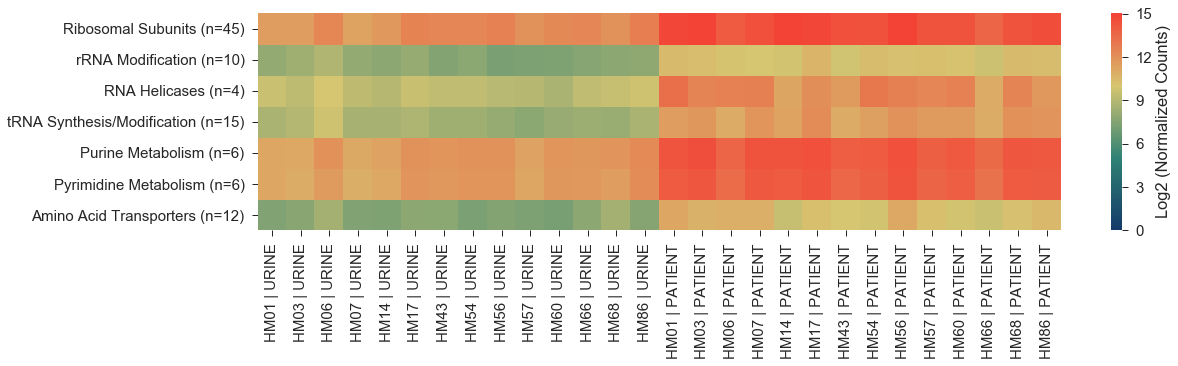

In [9]:
sns.set_context("notebook", font_scale=1.5)
fig = plt.figure(figsize=(18,4))
sns.heatmap(np.log2(up_data+1), cmap=my_cmap, vmin=0, cbar_kws={'label': 'Log2 (Normalized Counts)'})
#fn = os.path.join(figures_folder, today+"_figure_4a_v1.png")
#fig.savefig(fn, dpi=500, bbox_inches="tight")

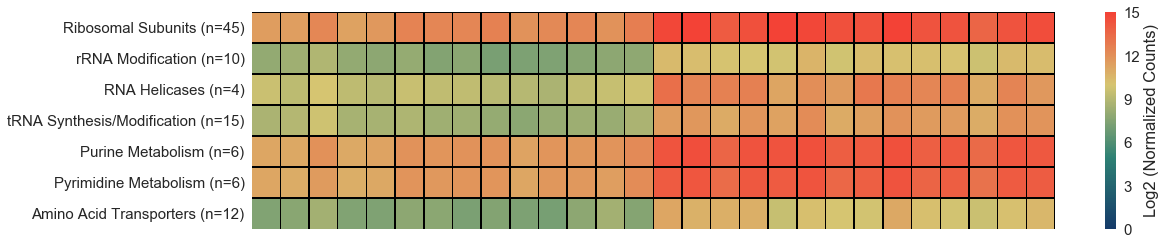

In [21]:
sns.set_style("white")
sns.set_context("notebook", font_scale=1.5)
fig = plt.figure(figsize=(18,4))
sns.heatmap(np.log2(up_data+1), cmap=my_cmap, linewidths=0.5, linecolor='black',
            vmin=0, cbar_kws={'label': 'Log2 (Normalized Counts)'})
ax = fig.gca()
ax.set_xticklabels("")
fn = os.path.join(figures_folder, today+"_figure_4a_v2.png")
fig.savefig(fn, dpi=500, bbox_inches="tight")

In [12]:
arginine = get_subset_genes(df_down, "Arginine", ["baseMean","log2FoldChange", 
                                                  "gene_name", "function","pathway"], "pathway")

val = get_subset_genes(df_down, "Valine", ["baseMean","log2FoldChange", 
                                                  "gene_name", "function","pathway"], "pathway")

maltose = get_subset_genes(df_down, "maltose", ["baseMean","log2FoldChange", 
                                                  "gene_name", "function"])
cys = get_subset_genes(df_down, "Cysteine",["baseMean","log2FoldChange", 
                                                  "gene_name", "function", "pathway"], "pathway" )

glycine = get_subset_genes(df_down, "Glycine",["baseMean","log2FoldChange", 
                                                  "gene_name", "function", "pathway"], "pathway" )
galactose = get_subset_genes(df_down, "Galactose",["baseMean","log2FoldChange", 
                                                  "gene_name", "function", "pathway"], "pathway" )

starch =  get_subset_genes(df_down, "Starch",["baseMean","log2FoldChange", 
                                                  "gene_name", "function", "pathway"], "pathway" )
biofilm =  get_subset_genes(df_down, "Biofilm",["baseMean","log2FoldChange", 
                                                  "gene_name", "function", "pathway"], "pathway" )
biofilm2 = get_subset_genes(df_down, "iofilm",["baseMean","log2FoldChange", 
                                                  "gene_name", "function", "pathway"] )
biofilm3 = get_subset_genes(df_down, "curli", ["baseMean","log2FoldChange", 
                                                  "gene_name", "function", "pathway"] )
Biofilm = pd.concat([biofilm, biofilm2, biofilm3]).drop_duplicates()

transp = get_subset_genes(df_down, "transporter", ["baseMean","log2FoldChange", 
                                                  "gene_name", "function", "pathway"] )
sugar_transp = ["b1900", "b2149", "b2150", "b3093", "b3566", "b3567", "b3568", "b3691",
               "b3750", "b3751", "b4227", "b4230", "b4460", "b4485"]
sugar_trans = df_down.loc[sugar_transp][["baseMean","log2FoldChange", "gene_name", "function"]]


In [13]:
down_subsets = {"Arginine Metabolism":(arginine, arginine.shape[0]),
               "Val/Leu/Ileu Metabolism":(val, val.shape[0]),
               "Cys/Met Metabolism": (cys, cys.shape[0]),
               "Gly/Ser/Thr Metabolism": (glycine, glycine.shape[0]),
               "Maltose Metabolism": (maltose, maltose.shape[0]),
               "Galactose Metabolism": (galactose, galactose.shape[0]),
               "Starch/Sucrose Metabolism": (starch, starch.shape[0]),
                "Sugar Transporters":(sugar_trans, sugar_trans.shape[0]),
               "Biofilm/Curli":(Biofilm, Biofilm.shape[0])}



In [14]:
down_data = find_subset_means(down_subsets, df, )
down_data.head()

HM01 | URINE  HM03 | URINE  HM06 | URINE  \
Arginine Metabolism (n=9)        4065.878321   3724.800930   4890.792230   
Val/Leu/Ileu Metabolism (n=12)   1315.228160   5054.292258   6360.968832   
Cys/Met Metabolism (n=8)         8614.074061  10360.169656  16597.555401   
Gly/Ser/Thr Metabolism (n=8)     4320.063351   4630.960369   4664.626353   
Maltose Metabolism (n=5)         5326.698398    794.873805   3620.370467   

                                HM07 | URINE  HM14 | URINE  HM17 | URINE  \
Arginine Metabolism (n=9)        1949.636333   6206.768160   3470.706276   
Val/Leu/Ileu Metabolism (n=12)   4727.997453    985.312496  17860.895242   
Cys/Met Metabolism (n=8)         5507.771703  22730.194888  35171.455030   
Gly/Ser/Thr Metabolism (n=8)     3605.625196   5630.126023   7110.212201   
Maltose Metabolism (n=5)          471.370256   3695.154807    158.444232   

                                HM43 | URINE  HM54 | URINE  HM56 | URINE  \
Arginine Metabolism (n=9)        3096.547075   6896.670845   6282.175410   
Val/Leu/Ileu Metabolism (n=12)   2085.863152   1904.151119  14232.024084   
Cys/Met Metabolism (n=8)        28714.576304  26203.046278  33507.396036   
Gly/Ser/Thr Metabolism (n=8)     5663.559552   6710.878426   6504.302662   
Maltose Metabolism (n=5)          901.124660   5102.558379   1726.090516   

                                HM57 | URINE       ...        HM14 | PATIENT  \
Arginine Metabolism (n=9)        2523.747981       ...           1061.427231   
Val/Leu/Ileu Metabolism (n=12)   1337.595053       ...            219.571209   
Cys/Met Metabolism (n=8)        41538.171197       ...           1916.594158   
Gly/Ser/Thr Metabolism (n=8)     6494.425762       ...           1228.283341   
Maltose Metabolism (n=5)         1872.665410       ...             14.234838   

                                HM17 | PATIENT  HM43 | PATIENT  \
Arginine Metabolism (n=9)           692.912960      618.668722   
Val/Leu/Ileu Metabolism (n=12)      348.595100      498.178219   
Cys/Met Metabolism (n=8)            978.418764     1848.729314   
Gly/Ser/Thr Metabolism (n=8)        615.922632      986.422308   
Maltose Metabolism (n=5)             37.981896      518.438938   

                                HM54 | PATIENT  HM56 | PATIENT  \
Arginine Metabolism (n=9)           343.981238      399.703841   
Val/Leu/Ileu Metabolism (n=12)      277.364235      308.321425   
Cys/Met Metabolism (n=8)            834.294784      615.587470   
Gly/Ser/Thr Metabolism (n=8)        821.522719      669.562566   
Maltose Metabolism (n=5)             29.830846       50.416961   

                                HM57 | PATIENT  HM60 | PATIENT  \
Arginine Metabolism (n=9)           275.505928      364.657547   
Val/Leu/Ileu Metabolism (n=12)      213.891184      140.755437   
Cys/Met Metabolism (n=8)            516.903694      537.186891   
Gly/Ser/Thr Metabolism (n=8)        484.225875      466.363744   
Maltose Metabolism (n=5)             98.231507       83.384234   

                                HM66 | PATIENT  HM68 | PATIENT  HM86 | PATIENT  
Arginine Metabolism (n=9)           420.691033      462.637091      846.827856  
Val/Leu/Ileu Metabolism (n=12)      364.598895      234.679105      439.903666  
Cys/Met Metabolism (n=8)            915.002997      885.507555     1184.388759  
Gly/Ser/Thr Metabolism (n=8)        620.519274      643.547237     1027.683052  
Maltose Metabolism (n=5)            218.759337       36.966160       46.724472  

[5 rows x 28 columns]

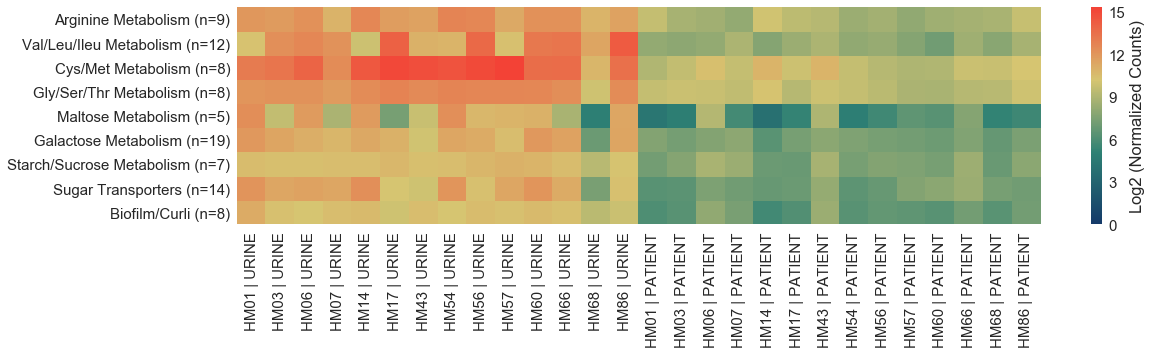

In [16]:
sns.set_context("notebook", font_scale=1.5)
fig = plt.figure(figsize=(18,4))
sns.heatmap(np.log2(down_data+1), cmap=my_cmap, vmin=0, cbar_kws={'label': 'Log2 (Normalized Counts)'})
ax = fig.gca()
#fn = os.path.join(figures_folder, today+"_figure_4b_v1.png")
#fig.savefig(fn, dpi=500, bbox_inches="tight")

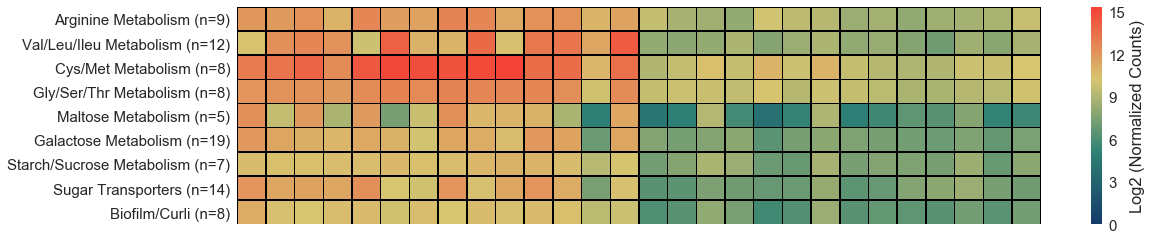

In [22]:
sns.set_context("notebook", font_scale=1.5)
fig = plt.figure(figsize=(18,4))
sns.heatmap(np.log2(down_data+1), cmap=my_cmap, vmin=0, linecolor="black", linewidths=0.5,
            cbar_kws={'label': 'Log2 (Normalized Counts)'});
ax = fig.gca()
ax.set_xticklabels("")
fn = os.path.join(figures_folder, today+"_figure_4b_v2.png")
fig.savefig(fn, dpi=500, bbox_inches="tight")

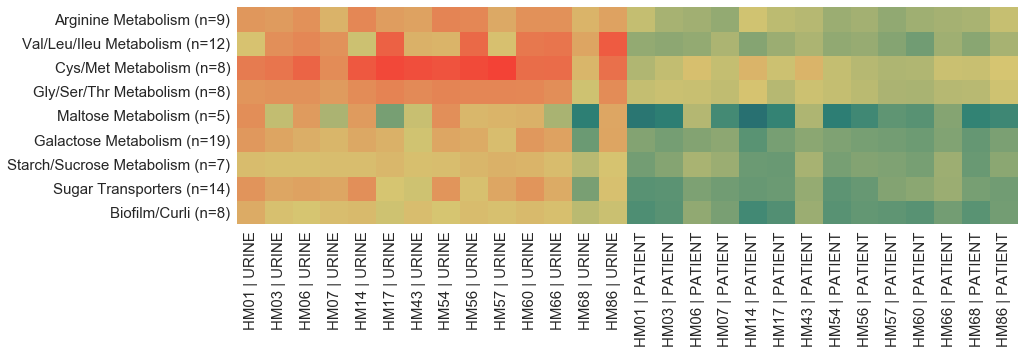

In [259]:
sns.set_context("notebook", font_scale=1.5)
fig = plt.figure(figsize=(14,4))
sns.heatmap(np.log2(down_data+1), cmap=my_cmap, vmin=0, cbar=False)
#fn = os.path.join(figures_folder, today+"_figure_4b_v1.png")
#fig.savefig(fn, dpi=500, bbox_inches="tight")

In [2]:
file = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/differential_expression_analysis/pg_contr_de_genes_DSeq2_norm_counts.csv"

In [3]:
cnts = pd.read_csv(file, index_col=0)

In [4]:
cnts.head()

HM03_UR     HM03_UTI     HM06_UR     HM06_UTI     HM07_UR  \
b4182   48.275274    15.213524   67.848666    37.531993   63.660071   
b1960   84.417191   120.621512   75.879732    82.883152  108.674932   
b2866  236.213241    18.473565  593.191193   143.872641  314.571312   
b0328  215.560717    22.820286   58.155999    82.883152  279.678135   
b1660  760.787344  2003.838450  826.092124  1566.960718  773.509813   

          HM07_UTI     HM14_UR    HM14_UTI     HM17_UR    HM17_UTI  \
b4182    36.698818   11.425505    2.815322  171.056518  117.599293   
b1960    69.319989   93.256828  118.947351   94.911106  158.503395   
b2866    81.552929  234.686056   13.372779  631.537778   46.017115   
b0328    16.310586  221.407766   22.522575  189.100455    5.113013   
b1660  1162.129233  768.905631  774.917359  473.112016  255.650638   

          ...         HM57_UR    HM57_UTI     HM60_UR     HM60_UTI  \
b4182     ...       63.197293  167.077908   28.583398    31.720616   
b1960     ...       48.851895  182.990090   58.881800    84.588310   
b2866     ...      586.222740  206.858363  336.712427    52.867694   
b0328     ...      159.737942   95.473090  621.974737   222.044314   
b1660     ...      193.856726  835.389541  384.732535  1332.265884   

          HM66_UR    HM66_UTI     HM68_UR     HM68_UTI     HM86_UR    HM86_UTI  
b4182   62.494339  170.304804   25.117646    16.648910   36.393858   24.257380  
b1960   45.366261  170.304804   96.736880   166.489103   60.324065  100.859632  
b2866  823.073594  340.609607   93.342603    26.638256  576.817717   25.534084  
b0328  471.253610  340.609607   24.438791    16.648910  136.103057    7.660225  
b1660  325.433485  340.609607  613.685189  1008.923964  317.075253  439.186245  

[5 rows x 26 columns]

In [5]:
fl = ["b1071",
     "b1072",
     "b1073",
     "b1074",
     "b1075",
     "b1076",
     "b1077",
     "b1078",
     "b1079",
     "b1080",
     "b1081"]
     

In [6]:
fl_df = cnts.loc[fl]
uti_cols = [c for c in fl_df.columns if "UTI" in c]

In [7]:
fl_df

HM03_UR     HM03_UTI    HM06_UR   HM06_UTI     HM07_UR  \
b1071   193.359254    40.207171  52.617333  21.893663  355.324411   
b1072   163.413094    85.847743  35.447466  23.457496   30.631415   
b1073   273.387783   130.401635   1.938533  10.946831    5.327203   
b1074   415.890197   198.862493   4.430933   4.691499    6.925363   
b1075   603.570007   294.490358  14.123600  10.946831   30.897775   
b1076  1600.570592  1193.174956  63.140799  51.606491  102.282289   
b1077   236.471397   159.742002  15.508266  17.202164   17.047048   
b1078   336.119824   202.122534  20.493066  15.638331   28.766894   
b1079   150.505267   108.668029  12.738933  14.074497    9.056244   
b1080   324.760936   233.636262  36.832133  43.787325   35.958617   
b1081   238.536649   154.308601  23.539333  31.276661   17.313408   

           HM07_UTI    HM14_UR      HM14_UTI     HM17_UR    HM17_UTI  \
b1071    754.364590  40.761262    325.873512   84.445623   97.147242   
b1072   1329.312737  28.100567   1091.641075   20.930966   97.147242   
b1073   1655.524451   1.235190   1534.350448   35.005237  189.181472   
b1074   1639.213865   5.558354   2920.896494   25.261511  158.503395   
b1075   3368.135952  11.425505   3706.371311   80.115078  352.797880   
b1076  10344.988996  42.922844  13003.268128  236.375569  797.629990   
b1077   1704.456208   5.249557    658.081499   57.740597  148.277370   
b1078   2002.124398  12.660695   1806.029013   52.327416  153.390383   
b1079    660.578722  12.351898    874.861287   36.448752   61.356153   
b1080   1696.300915  25.630188   1800.398369   76.867170  173.842434   
b1081   1268.148040  12.969493   1153.578158   59.184112  138.051344   

          ...         HM57_UR    HM57_UTI     HM60_UR    HM60_UTI    HM66_UR  \
b1071     ...       71.339275    7.956091   52.021784   10.573539  84.714549   
b1072     ...       18.610246   39.780454   29.726734   31.720616  38.422446   
b1073     ...        3.489421   15.912182   20.008378   31.720616  10.647184   
b1074     ...        6.203415   23.868273   17.721707   42.294155   4.629210   
b1075     ...       13.569971   23.868273   33.728409   21.147078  19.905604   
b1076     ...      108.559767  135.253545  110.903584  190.323698  40.274130   
b1077     ...       19.385673   31.824363   21.723382   10.573539  11.110105   
b1078     ...        5.815702   55.692636   25.153390   10.573539  44.440419   
b1079     ...        9.305123   55.692636   15.435035   10.573539  16.665157   
b1080     ...       37.995918   39.780454   38.873421   84.588310  46.755024   
b1081     ...       44.974760   47.736545   28.011730   74.014771  41.662893   

         HM66_UTI    HM68_UR   HM68_UTI    HM86_UR    HM86_UTI  
b1071  255.457205  46.841016  26.638256  90.236825   58.728393  
b1072   85.152402  19.686804  26.638256  17.449110   58.728393  
b1073   85.152402   3.054849  26.638256   1.994184   81.709069  
b1074   85.152402   5.091415  26.638256   8.973828   44.684647  
b1075  170.304804  10.522257  46.616949  17.449110  154.481208  
b1076  510.914411  70.261523  83.244552  52.845876  242.573798  
b1077    0.000000  14.595389  23.308474  17.449110   80.432365  
b1078  170.304804  46.501588  26.638256  18.446202   61.281802  
b1079    0.000000  26.814784  19.978692  16.950564   21.703971  
b1080   85.152402  72.976944  49.946731  28.915668   52.344872  
b1081   85.152402  58.042128  46.616949  30.411306   88.092590  

[11 rows x 26 columns]

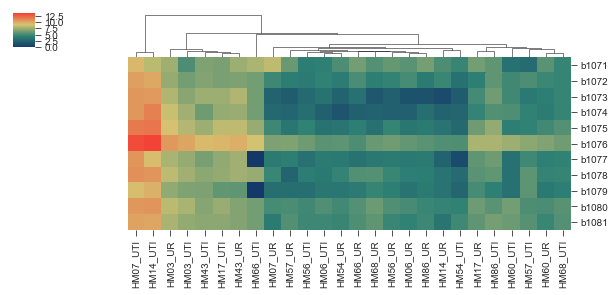

In [59]:
sns.clustermap(np.log2(fl_df+1), cmap=my_cmap, figsize=(10,4), row_cluster=False)

In [8]:
uti = fl_df[uti_cols]

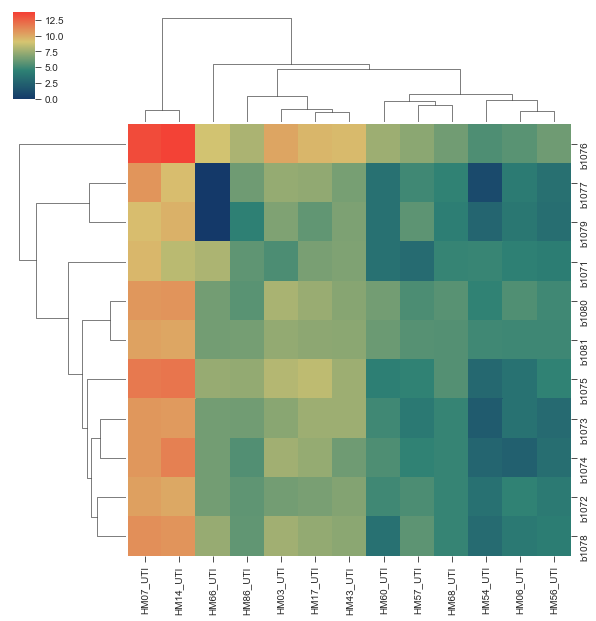

In [9]:
sns.clustermap(np.log2(uti+1), cmap=my_cmap)

In [10]:
mot = ["b1880",
     "b1882",
     "b1888",
     "b1889",
     "b1890"]

In [60]:
flhdc = ["b1891", "b1892"]

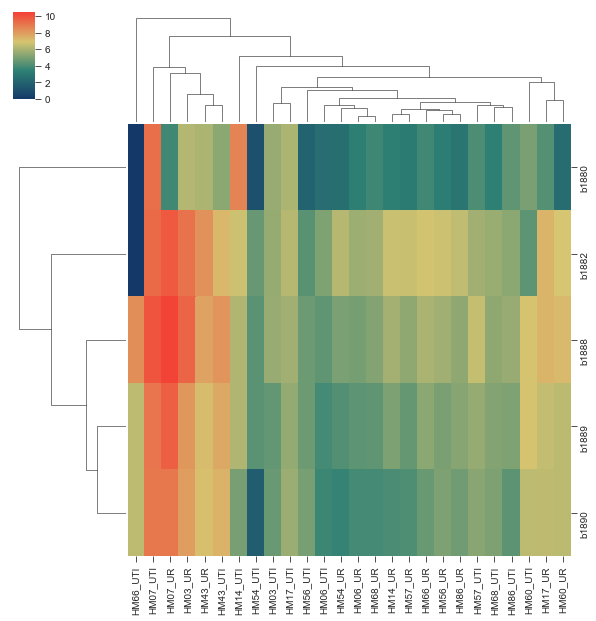

In [12]:
mot_df = cnts.loc[mot]
sns.clustermap(np.log2(mot_df+1), cmap=my_cmap)

In [65]:
flhdc_df

HM03_UR    HM03_UTI     HM06_UR   HM06_UTI      HM07_UR  \
b1891  1277.616751  163.002043  145.666932  34.404327  1547.818706   
b1892  1962.506070  239.069663  321.796530  82.883152  2321.594878   

         HM07_UTI     HM14_UR    HM14_UTI     HM17_UR    HM17_UTI     ...      \
b1891  566.792854  298.915924  295.608802  503.064950  168.729421     ...       
b1892  701.355186  413.479775  560.249063  893.896616  383.475956     ...       

          HM57_UR   HM57_UTI     HM60_UR    HM60_UTI     HM66_UR    HM66_UTI  \
b1891   78.318117  47.736545  726.589973  243.191392  387.464903   85.152402   
b1892  165.553644  87.517000  931.247102  444.088628  571.244553  170.304804   

         HM68_UR    HM68_UTI     HM86_UR    HM86_UTI  
b1891  15.613672  126.531718  227.336974  174.908475  
b1892  29.530205  239.744308  402.825164  337.049909  

[2 rows x 26 columns]

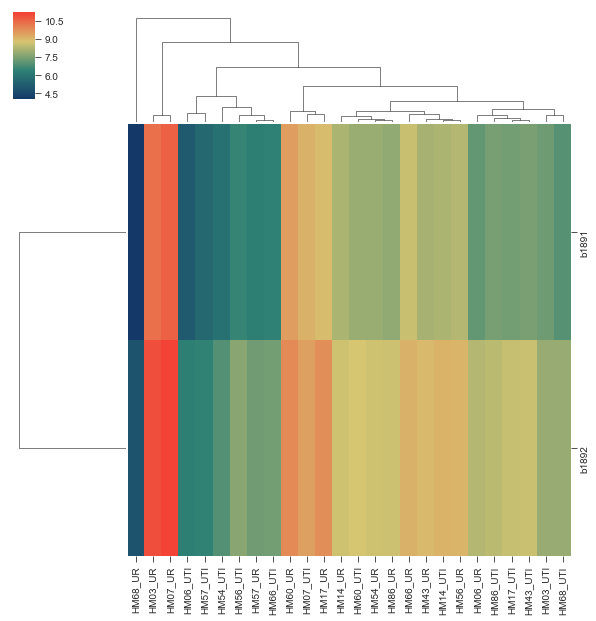

In [67]:
sns.clustermap(np.log2(flhdc_df+1), cmap=my_cmap)

In [27]:
file = "/Users/annasintsova/git_repos/HUTI-RNAseq/results/differential_expression_analysis/pg_uti_de_genes_significant.csv"

In [28]:
pg_de = pd.read_csv(file, index_col=0)

In [29]:
pg_de

baseMean  log2FoldChange     lfcSE      stat        pvalue  \
b3946    61.142421        4.870742  0.624181  7.803411  6.025596e-15   
b3078    23.030877        4.419339  0.995705  4.438401  9.062982e-06   
b4671    15.116153        4.234413  1.368644  3.093875  1.975610e-03   
b2162     7.780051        4.001266  1.053290  3.798828  1.453821e-04   
b2870    18.966370        3.875912  1.097708  3.530913  4.141275e-04   
b4322   595.160257        3.849033  0.498536  7.720667  1.157222e-14   
b0063    37.951856        3.609119  1.082920  3.332765  8.598763e-04   
b0698    20.301469        3.557913  0.905191  3.930566  8.474624e-05   
b3077    13.710397        3.542052  0.882231  4.014882  5.947563e-05   
b0294    75.149929        3.464250  0.911714  3.799713  1.448640e-04   
b3225   187.176187        3.357873  0.658188  5.101693  3.366290e-07   
b4181    28.676474        3.268805  1.012921  3.227107  1.250487e-03   
b4033    40.390603        3.202998  0.856328  3.740387  1.837373e-04   
b3092   170.049006        3.104167  0.645692  4.807503  1.528272e-06   
b3674    15.740240        3.071499  0.676179  4.542432  5.560903e-06   
b0697    16.667263        3.028719  0.941375  3.217334  1.293877e-03   
b0616    36.907076        2.982574  0.933721  3.194288  1.401762e-03   
b1972    37.001043        2.977898  0.968020  3.076278  2.096025e-03   
b3076   122.860669        2.845139  0.609867  4.665177  3.083510e-06   
b3091    81.016778        2.779929  0.638716  4.352374  1.346715e-05   
b2253    41.634144        2.778097  0.445733  6.232648  4.586146e-10   
b0344    41.810939        2.753543  0.912941  3.016124  2.560284e-03   
b0366    11.009008        2.683853  0.835511  3.212232  1.317082e-03   
b1412   258.563387        2.582392  0.814640  3.169982  1.524486e-03   
b4183    11.960000        2.578229  0.791437  3.257655  1.123368e-03   
b3074    38.556799        2.510448  0.690764  3.634304  2.787318e-04   
b3945    75.139259        2.444582  0.565918  4.319679  1.562561e-05   
b0010   366.282701        2.298834  0.742912  3.094356  1.972406e-03   
b3680    13.606908        2.243396  0.529456  4.237172  2.263527e-05   
b3222    26.787172        2.198541  0.625831  3.512996  4.430835e-04   
...            ...             ...       ...       ...           ...   
b2710    42.172028        2.168487  0.715179  3.032087  2.428689e-03   
b0304    45.115178        2.084889  0.695445  2.997923  2.718265e-03   
b0999    13.626934        2.082276  0.679634  3.063819  2.185311e-03   
b1661  1316.655086       -2.131859  0.520006 -4.099679  4.137237e-05   
b0906    52.089012       -2.159649  0.560096 -3.855858  1.153244e-04   
b0307   193.936303       -2.202184  0.720034 -3.058445  2.224889e-03   
b0308    95.722363       -2.284476  0.761893 -2.998422  2.713820e-03   
b1882    35.371806       -2.316696  0.752360 -3.079238  2.075305e-03   
b0306   238.668680       -2.319078  0.733804 -3.160349  1.575801e-03   
b2524   319.860846       -2.651878  0.304229 -8.716725  2.863633e-18   
b1379   153.874847       -2.690994  0.571563 -4.708131  2.499985e-06   
b2732    68.363354       -2.830011  0.759523 -3.726036  1.945147e-04   
b1071    48.763304       -2.880288  0.813997 -3.538452  4.024808e-04   
b1925    37.470522       -2.912274  0.974267 -2.989194  2.797146e-03   
b3589    56.224250       -3.356761  0.715722 -4.690036  2.731564e-06   
b1921    71.062902       -3.607961  0.865127 -4.170442  3.040100e-05   
b1081    91.058765       -3.622243  0.608702 -5.950766  2.668905e-09   
b1083    95.126069       -3.750941  0.644601 -5.819016  5.919517e-09   
b1082   165.879797       -3.809001  0.677833 -5.619378  1.916465e-08   
b1880    34.095910       -4.062539  0.902588 -4.500988  6.763826e-06   
b1079    53.954590       -4.068569  0.787029 -5.169526  2.346881e-07   
b1072    83.422815       -4.123990  0.727543 -5.668380  1.441536e-08   
b1073   109.646689       -4.137004  0.938233 -4.409358  1.036774e-05   
b1080   123.106571       -4.169943  0.620537 -6.71

In [36]:
df = cnts.loc[pg_de.index].sort_index()

In [31]:
len(pg_de.index)

61

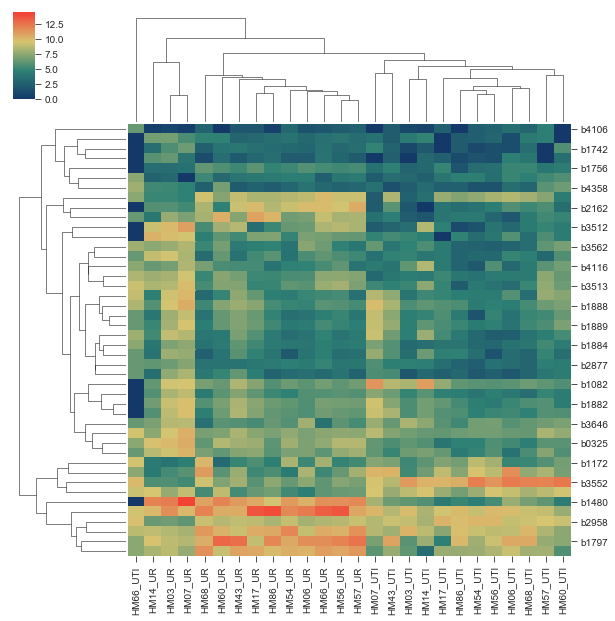

In [26]:
sns.clustermap(np.log2(df+1), cmap=my_cmap)

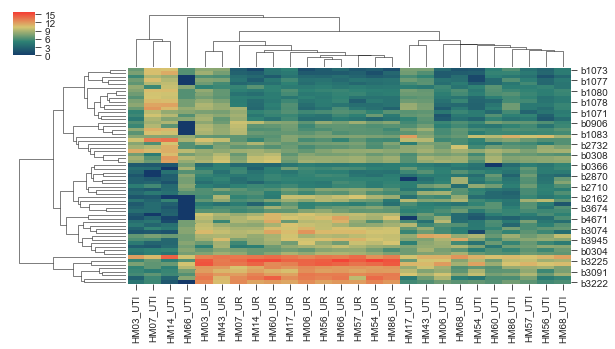

In [39]:
sns.clustermap(np.log2(df+1), cmap=my_cmap, figsize = (10, 5), )